## Car Price Prediction with Machine Learning

The price of a car depends on a lot of factors like the goodwill of
the brand of the car,
features of the car, horsepower and the mileage it gives and
many more. Car price
prediction is one of the major research areas in machine
learning. So if you want to learn
how to train a car price prediction model then this project is for
you.


<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cm\AppData\Local\Temp\ipykernel_10548\3421008878.py:12: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("D:\data science projects\8car data\car data.csv")


Mean Absolute Error (MAE): 0.50
Mean Squared Error (MSE): 0.73
R² Score: 0.9228


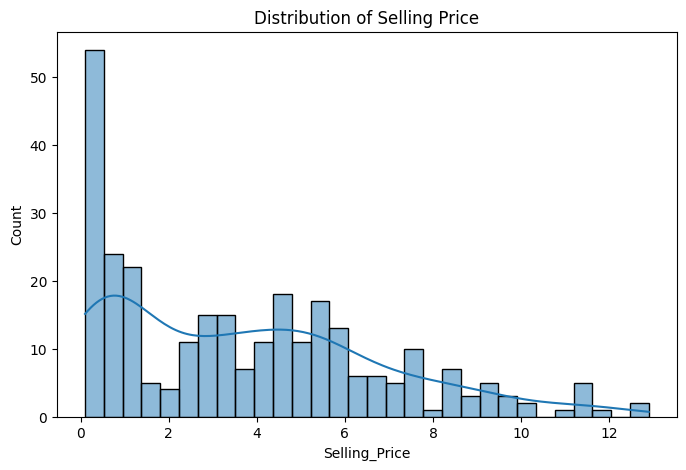

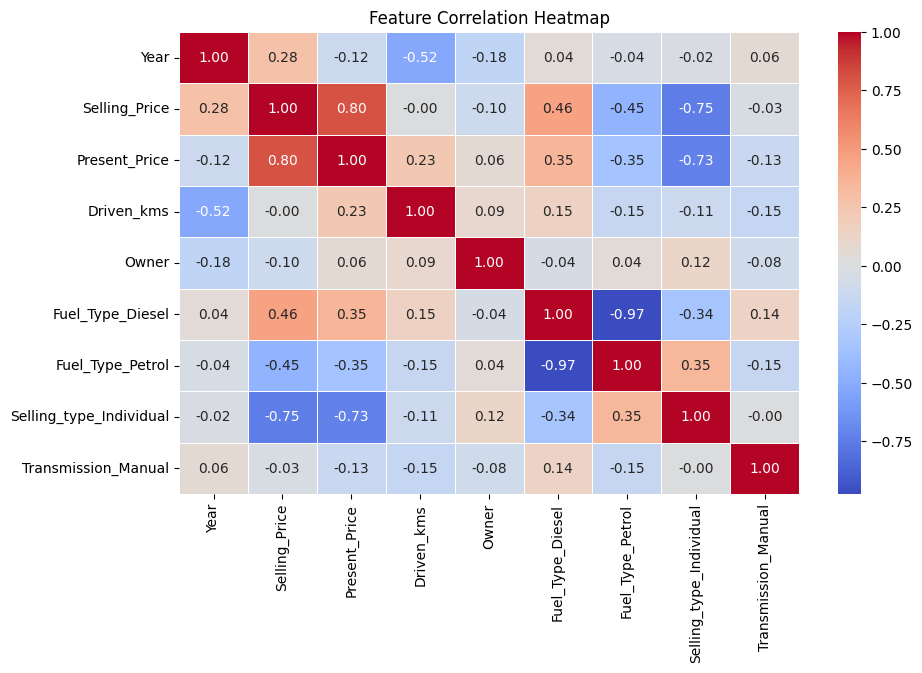

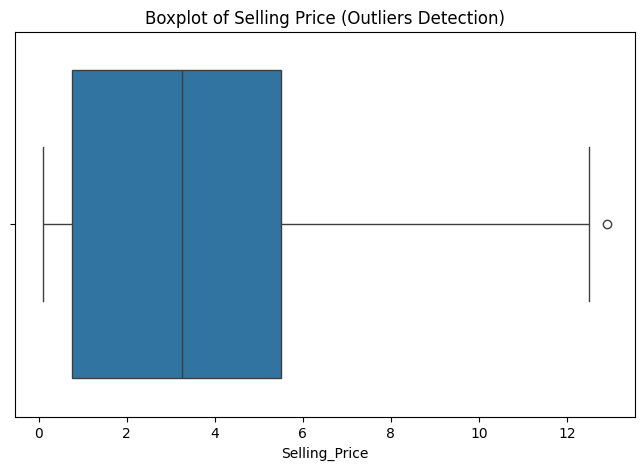

C:\Users\cm\AppData\Local\Temp\ipykernel_10548\3421008878.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


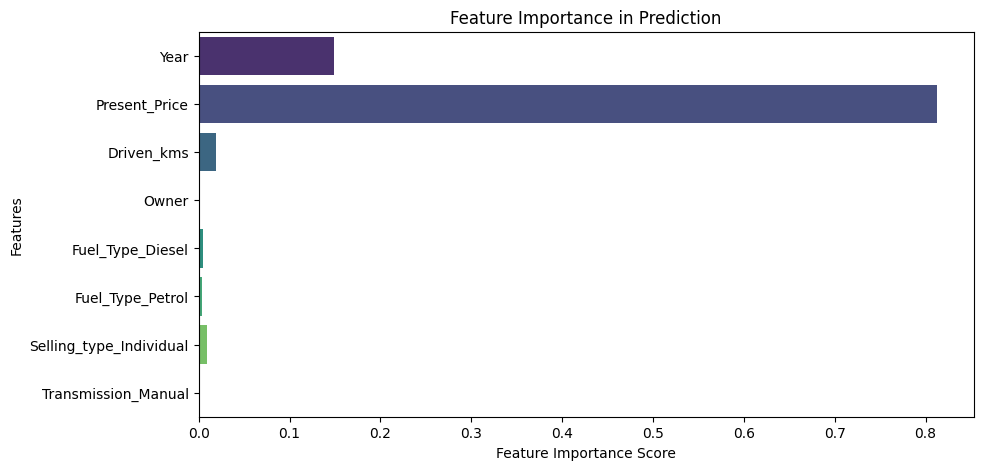

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load Dataset
df = pd.read_csv("D:\data science projects\8car data\car data.csv")

# Handle Missing Values (if any)
df.dropna(inplace=True)

# Remove Outliers Using IQR Method
Q1 = df["Selling_Price"].quantile(0.25)
Q3 = df["Selling_Price"].quantile(0.75)
IQR = Q3 - Q1

# Define Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove Outliers
df = df[(df["Selling_Price"] >= lower_bound) & (df["Selling_Price"] <= upper_bound)]

# Encode Categorical Features (One-Hot Encoding)
df = pd.get_dummies(df, columns=["Fuel_Type", "Selling_type", "Transmission"], drop_first=True)

# Drop Car_Name (Fix for ValueError)
df.drop(columns=["Car_Name"], inplace=True)

# Select Features and Target Variable
X = df.drop(columns=["Selling_Price"])  # Features
y = df["Selling_Price"]  # Target

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Model
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Model Performance
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# # Save Model (Optional)
# joblib.dump(model, "car_price_prediction_model.pkl")
# print("✅ Model training and evaluation completed successfully!")

# ===================== VISUALIZATION =====================

# 1. Distribution of Selling Price
plt.figure(figsize=(8,5))
sns.histplot(df["Selling_Price"], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Boxplot for Outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Selling_Price"])
plt.title("Boxplot of Selling Price (Outliers Detection)")
plt.show()

# 4. Feature Importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")  # Add label for X-axis
plt.ylabel("Features")  # Add label for Y-axis
plt.title("Feature Importance in Prediction")
plt.show()
